In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from math import sqrt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [31]:
#df = pd.read_excel('Crescent_Dataset.xlsx')

In [199]:
database = "UTD_V4.db"
connection = sql.connect(database)
query = '''select * from Crescent_Dataset'''

In [200]:
df = pd.read_sql_query(query,connection)

In [201]:
df.head(10)

,masked_acct,key_1,Vintage,ChargeOffMonthKey,ChargeOffMOB,Loss_Date_150,BalanceAtDefault,JointIndicator,LCPIndicator,FICOScore,...,TotalDownPmtPctBBVehicleValue,TotalDownPmtPctLine3,TotalDownPmtPctLine4,TotalDownPmtPctLine5,DealerReserve,ContractRate,BuyRate,masked_acct:1,max_score_ind,RecoveryPctBalanceAtDefaultRatioMACO12
0,0001374cd7856b8999ef0b661d515142,ss1239,201708,201811,15,2018-11-05 00:00:00,9914.12,0,1,535,...,0.1230,0.0916,0.0893,0.0721,440.89,20.75,18.75,0001374cd7856b8999ef0b661d515142,7.0,0.1856
1,000170f205857037065589a606caae25,ss1240,201803,201811,8,2018-11-26 00:00:00,22211.39,0,0,652,...,0.1138,0.1036,0.0932,0.0894,1054.77,20.20,18.20,000170f205857037065589a606caae25,6.0,0.5442
2,00060788de8277720911f32a3b355754,ss1241,201501,201704,27,2017-04-26 00:00:00,8484.37,0,0,534,...,0.3563,0.3893,0.3495,0.3495,0.00,15.75,15.75,00060788de8277720911f32a3b355754,7.0,0.0000
3,000b9612a76d2800a8daad266c9e1eb1,ss1242,201505,201611,18,2016-11-13 00:00:00,15470.65,0,0,467,...,0.1068,0.1007,0.0953,0.0907,839.70,17.75,15.75,000b9612a76d2800a8daad266c9e1eb1,8.0,0.3586
4,000c9915e9eb935ee32c691e2f3efb49,ss1243,201711,201807,8,2018-07-26 00:00:00,14905.78,0,0,495,...,0.1121,0.0936,0.0841,0.0792,0.00,18.00,18.00,000c9915e9eb935ee32c691e2f3efb49,9.0,0.5889
5,00204ddf75ae840de9e6a8c1ee41ff14,ss1244,201601,201810,33,2018-10-11 00:00:00,7760.71,0,1,None,...,0.3828,0.2597,0.2333,0.2135,204.09,25.00,24.00,00204ddf75ae840de9e6a8c1ee41ff14,9.0,0.2991
6,0031690a89912e70c2abe27684a817dc,ss1245,201709,201812,15,2018-12-27 00:00:00,13260.44,0,0,None,...,0.1008,0.0920,0.0842,0.0721,707.33,20.50,18.50,0031690a89912e70c2abe27684a817dc,7.0,0.3246
7,0032b0f87e43f69229327a9a296e5f70,ss1246,201603,201703,12,2017-03-06 00:00:00,14878.05,0,0,None,...,0.2708,0.2746,0.2704,0.2252,715.57,17.50,15.50,0032b0f87e43f69229327a9a296e5f70,8.0,0.2974
8,003847952f99d78e7ce971e49ef2e143,ss1247,201507,201605,10,2016-05-14 00:00:00,20073.82,1,0,None,...,0.6237,0.8286,0.7056,0.7056,1000.38,14.75,12.75,003847952f99d78e7ce971e49ef2e143,9.0,0.9667
9,00397dc0d4b5764917074e09a557c75d,ss1248,201608,201805,21,2018-05-31 00:00:00,14078.06,1,0,510,...,0.4020,0.3334,0.3010,0.2613,679.18,15.25,13.25,00397dc0d4b5764917074e09a557c75d,6.0,0.4162


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 95 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   masked_acct                                          13719 non-null  object 
 1   key_1                                                13719 non-null  object 
 2   Vintage                                              13719 non-null  object 
 3   ChargeOffMonthKey                                    13719 non-null  object 
 4   ChargeOffMOB                                         13719 non-null  object 
 5   Loss_Date_150                                        13719 non-null  object 
 6   BalanceAtDefault                                     13719 non-null  object 
 7   JointIndicator                                       13719 non-null  object 
 8   LCPIndicator                                         13719 non-nul

In [203]:
df.describe()

,DealerFeeNet,NumJobsApplicant,EmploymentMonthsSinceHiredCurrentEmployerApplicant,CreditBureauNumTrades,CreditBureauNumTradesCurrent,CreditBureauNumCollections,NumExceptionALL,NumExceptionLTV,NumExceptionPTI,NumExceptionDTI,...,TotalDownPmt,TotalDownPmtPctBBVehicleValue,TotalDownPmtPctLine3,TotalDownPmtPctLine4,TotalDownPmtPctLine5,DealerReserve,ContractRate,BuyRate,max_score_ind,RecoveryPctBalanceAtDefaultRatioMACO12
count,13718.000000,13718.0,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,...,13718.000000,13697.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000
mean,-9.523878,1.0,53.124945,15.715629,1.729188,5.011372,0.547019,0.009914,0.017641,0.011007,...,2338.446320,0.199206,0.179627,0.161493,0.147559,611.488780,19.284425,17.862577,7.507800,0.442806
std,564.417021,0.0,66.172488,11.868701,3.008880,5.738374,0.674209,0.099078,0.131648,0.104341,...,1866.215719,0.138259,0.160846,0.137916,0.122662,421.006677,2.821591,2.921407,1.112753,0.231710
min,-2861.250000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7612.800000,-0.646500,-0.339000,-0.331800,-0.288500,0.000000,10.990000,9.989900,6.000000,0.000000
25%,-413.042500,1.0,12.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1350.000000,0.118200,0.097225,0.089100,0.081800,252.670000,17.250000,15.750000,7.000000,0.294000
50%,-66.920000,1.0,30.000000,13.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,2000.000000,0.169500,0.140900,0.128200,0.118250,657.430000,18.750000,18.000000,8.000000,0.479600
75%,415.107500,1.0,63.000000,21.000000,2.000000,7.000000,1.000000,0.000000,0.000000,0.000000,...,3000.000000,0.257100,0.221600,0.199900,0.185100,938.935000,21.000000,19.750000,8.000000,0.608800
max,2424.000000,1.0,600.000000,142.000000,50.000000,139.000000,6.000000,1.000000,1.000000,1.000000,...,34080.000000,1.392300,3.000000,2.296900,2.296900,2477.159900,26.000000,26.000000,9.000000,1.000000


In [160]:
df.columns.sort_values()

Index(['ApplicationWeekday', 'BackendGapAmt', 'BackendTotalAmt',
       'BackendTotalPctBBVehicleValue',
       'BackendTotalPctBBVehicleValueGTE13PctIndicator',
       'BackendTotalPctLine3', 'BackendTotalPctLine4', 'BackendTotalPctLine5',
       'BackendType', 'BackendWarrantyAmt', 'BalanceAtDefault', 'BuyRate',
       'CashDownPmt', 'CashDownPmtPctBBVehicleValue', 'CashDownPmtPctLine3',
       'CashDownPmtPctLine4', 'CashDownPmtPctLine5', 'ChargeOffMOB',
       'ChargeOffMonthKey', 'ContractRate', 'CreditBureauNumCollections',
       'CreditBureauNumTrades', 'CreditBureauNumTradesCurrent',
       'CreditBureauPctTradesDelq', 'CreditBureauRevolvingCreditLinePctUsed',
       'DealerFeeNet', 'DealerReserve', 'EmploymentJobTypeApplicant',
       'EmploymentMonthsSinceHiredCurrentEmployerApplicant', 'FICOScore',
       'FICOScorePctAvgFICOLast30DaysBookedLoans', 'FinancedAmt',
       'JDPUVIDiffCOFromOrig', 'JDPowerUsedVehicleIndex', 'JointIndicator',
       'LCPIndicator', 'LTVLine3', '

In [204]:
df = df.drop([13718])
df['BackendType']

0        BackendWarranty
1             BackendGAP
2            BackendNone
3             BackendGAP
4             BackendGAP
              ...       
13713        BackendNone
13714        BackendNone
13715    BackendWarranty
13716         BackendGAP
13717    BackendWarranty
Name: BackendType, Length: 13718, dtype: object

In [205]:
df_dummies = pd.get_dummies(df, columns=['BackendType'])
df_dummies.head()

,masked_acct,key_1,Vintage,ChargeOffMonthKey,ChargeOffMOB,Loss_Date_150,BalanceAtDefault,JointIndicator,LCPIndicator,FICOScore,...,DealerReserve,ContractRate,BuyRate,masked_acct:1,max_score_ind,RecoveryPctBalanceAtDefaultRatioMACO12,BackendType_BackendGAP,BackendType_BackendGapAndWarranty,BackendType_BackendNone,BackendType_BackendWarranty
0,0001374cd7856b8999ef0b661d515142,ss1239,201708,201811,15,2018-11-05 00:00:00,9914.12,0,1,535,...,440.89,20.75,18.75,0001374cd7856b8999ef0b661d515142,7.0,0.1856,0,0,0,1
1,000170f205857037065589a606caae25,ss1240,201803,201811,8,2018-11-26 00:00:00,22211.39,0,0,652,...,1054.77,20.20,18.20,000170f205857037065589a606caae25,6.0,0.5442,1,0,0,0
2,00060788de8277720911f32a3b355754,ss1241,201501,201704,27,2017-04-26 00:00:00,8484.37,0,0,534,...,0.00,15.75,15.75,00060788de8277720911f32a3b355754,7.0,0.0000,0,0,1,0
3,000b9612a76d2800a8daad266c9e1eb1,ss1242,201505,201611,18,2016-11-13 00:00:00,15470.65,0,0,467,...,839.70,17.75,15.75,000b9612a76d2800a8daad266c9e1eb1,8.0,0.3586,1,0,0,0
4,000c9915e9eb935ee32c691e2f3efb49,ss1243,201711,201807,8,2018-07-26 00:00:00,14905.78,0,0,495,...,0.00,18.00,18.00,000c9915e9eb935ee32c691e2f3efb49,9.0,0.5889,1,0,0,0


In [206]:
df_dummies = pd.get_dummies(df_dummies, columns=['EmploymentJobTypeApplicant'])
df_dummies.head()

,masked_acct,key_1,Vintage,ChargeOffMonthKey,ChargeOffMOB,Loss_Date_150,BalanceAtDefault,JointIndicator,LCPIndicator,FICOScore,...,BackendType_BackendGapAndWarranty,BackendType_BackendNone,BackendType_BackendWarranty,EmploymentJobTypeApplicant_EMPLOYED,EmploymentJobTypeApplicant_MILITARY,EmploymentJobTypeApplicant_MISSING,EmploymentJobTypeApplicant_OTHER,EmploymentJobTypeApplicant_RETIRED,EmploymentJobTypeApplicant_SELF-EMPLOYED,EmploymentJobTypeApplicant_UNEMPLOYED
0,0001374cd7856b8999ef0b661d515142,ss1239,201708,201811,15,2018-11-05 00:00:00,9914.12,0,1,535,...,0,0,1,1,0,0,0,0,0,0
1,000170f205857037065589a606caae25,ss1240,201803,201811,8,2018-11-26 00:00:00,22211.39,0,0,652,...,0,0,0,1,0,0,0,0,0,0
2,00060788de8277720911f32a3b355754,ss1241,201501,201704,27,2017-04-26 00:00:00,8484.37,0,0,534,...,0,1,0,1,0,0,0,0,0,0
3,000b9612a76d2800a8daad266c9e1eb1,ss1242,201505,201611,18,2016-11-13 00:00:00,15470.65,0,0,467,...,0,0,0,1,0,0,0,0,0,0
4,000c9915e9eb935ee32c691e2f3efb49,ss1243,201711,201807,8,2018-07-26 00:00:00,14905.78,0,0,495,...,0,0,0,0,0,0,1,0,0,0


In [207]:
df_dummies = pd.get_dummies(df_dummies, columns=['VehicleMakeNADA'])
df_dummies.head()


,masked_acct,key_1,Vintage,ChargeOffMonthKey,ChargeOffMOB,Loss_Date_150,BalanceAtDefault,JointIndicator,LCPIndicator,FICOScore,...,VehicleMakeNADA_MITSUBISHI,VehicleMakeNADA_NISSAN,VehicleMakeNADA_PONTIAC,VehicleMakeNADA_SATURN,VehicleMakeNADA_SCION,VehicleMakeNADA_SUBARU,VehicleMakeNADA_SUZUKI,VehicleMakeNADA_TOYOTA,VehicleMakeNADA_VOLKSWAGEN,VehicleMakeNADA_VOLVO
0,0001374cd7856b8999ef0b661d515142,ss1239,201708,201811,15,2018-11-05 00:00:00,9914.12,0,1,535,...,0,0,0,0,0,0,0,0,0,0
1,000170f205857037065589a606caae25,ss1240,201803,201811,8,2018-11-26 00:00:00,22211.39,0,0,652,...,0,0,0,0,0,0,0,0,0,0
2,00060788de8277720911f32a3b355754,ss1241,201501,201704,27,2017-04-26 00:00:00,8484.37,0,0,534,...,0,1,0,0,0,0,0,0,0,0
3,000b9612a76d2800a8daad266c9e1eb1,ss1242,201505,201611,18,2016-11-13 00:00:00,15470.65,0,0,467,...,0,0,0,0,0,0,0,0,0,0
4,000c9915e9eb935ee32c691e2f3efb49,ss1243,201711,201807,8,2018-07-26 00:00:00,14905.78,0,0,495,...,0,0,0,0,0,0,0,0,0,0


In [208]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13718 entries, 0 to 13717
Columns: 140 entries, masked_acct to VehicleMakeNADA_VOLVO
dtypes: float64(50), object(42), uint8(48)
memory usage: 10.3+ MB


In [170]:
df_dummies.columns[99:140]

Index(['EmploymentJobTypeApplicant_OTHER',
       'EmploymentJobTypeApplicant_RETIRED',
       'EmploymentJobTypeApplicant_SELF-EMPLOYED',
       'EmploymentJobTypeApplicant_UNEMPLOYED', 'VehicleMakeNADA_ACURA',
       'VehicleMakeNADA_AUDI', 'VehicleMakeNADA_BMW', 'VehicleMakeNADA_BUICK',
       'VehicleMakeNADA_CADILLAC', 'VehicleMakeNADA_CHEVROLET',
       'VehicleMakeNADA_CHEVROLET TRUCK', 'VehicleMakeNADA_CHRYSLER',
       'VehicleMakeNADA_DODGE', 'VehicleMakeNADA_DODGE TRUCK',
       'VehicleMakeNADA_FIAT', 'VehicleMakeNADA_FORD',
       'VehicleMakeNADA_FORD TRUCK', 'VehicleMakeNADA_GMC LIGHT DUTY',
       'VehicleMakeNADA_HONDA', 'VehicleMakeNADA_HUMMER',
       'VehicleMakeNADA_HYUNDAI', 'VehicleMakeNADA_INFINITI',
       'VehicleMakeNADA_JAGUAR', 'VehicleMakeNADA_JEEP', 'VehicleMakeNADA_KIA',
       'VehicleMakeNADA_LEXUS', 'VehicleMakeNADA_LINCOLN',
       'VehicleMakeNADA_MAZDA', 'VehicleMakeNADA_MERCEDES-BENZ',
       'VehicleMakeNADA_MERCURY', 'VehicleMakeNADA_MINI',
    

In [209]:
new_df = df_dummies[['BuyRate','ContractRate','BackendTotalAmt','BackendWarrantyAmt','BackendGapAmt','PaymentToFinancedAmtRatio','LTVLine3ExclRebate','MoodysUVIDiffCOFromOrig','NumJobsApplicant','RecoveryPctBalanceAtDefaultRatioMACO12','EmploymentJobTypeApplicant_EMPLOYED','EmploymentJobTypeApplicant_MILITARY','EmploymentJobTypeApplicant_MISSING','EmploymentJobTypeApplicant_OTHER','EmploymentJobTypeApplicant_RETIRED','EmploymentJobTypeApplicant_SELF-EMPLOYED','EmploymentJobTypeApplicant_UNEMPLOYED','BackendType_BackendGAP','BackendType_BackendGapAndWarranty', 'BackendType_BackendNone','BackendType_BackendWarranty', 'VehicleMakeNADA_ACURA','VehicleMakeNADA_AUDI', 'VehicleMakeNADA_BMW', 'VehicleMakeNADA_BUICK','VehicleMakeNADA_CADILLAC', 'VehicleMakeNADA_CHEVROLET','VehicleMakeNADA_CHEVROLET TRUCK', 'VehicleMakeNADA_CHRYSLER','VehicleMakeNADA_DODGE', 'VehicleMakeNADA_DODGE TRUCK','VehicleMakeNADA_FIAT', 'VehicleMakeNADA_FORD','VehicleMakeNADA_FORD TRUCK', 'VehicleMakeNADA_GMC LIGHT DUTY','VehicleMakeNADA_HONDA', 'VehicleMakeNADA_HUMMER','VehicleMakeNADA_HYUNDAI', 'VehicleMakeNADA_INFINITI','VehicleMakeNADA_JAGUAR', 'VehicleMakeNADA_JEEP', 'VehicleMakeNADA_KIA','VehicleMakeNADA_LEXUS', 'VehicleMakeNADA_LINCOLN','VehicleMakeNADA_MAZDA', 'VehicleMakeNADA_MERCEDES-BENZ','VehicleMakeNADA_MERCURY', 'VehicleMakeNADA_MINI','VehicleMakeNADA_MITSUBISHI', 'VehicleMakeNADA_NISSAN','VehicleMakeNADA_PONTIAC', 'VehicleMakeNADA_SATURN','VehicleMakeNADA_SCION', 'VehicleMakeNADA_SUBARU','VehicleMakeNADA_SUZUKI', 'VehicleMakeNADA_TOYOTA','VehicleMakeNADA_VOLKSWAGEN', 'VehicleMakeNADA_VOLVO']]

In [210]:
new_df.describe()

,BuyRate,ContractRate,BackendTotalAmt,BackendWarrantyAmt,BackendGapAmt,PaymentToFinancedAmtRatio,LTVLine3ExclRebate,MoodysUVIDiffCOFromOrig,NumJobsApplicant,RecoveryPctBalanceAtDefaultRatioMACO12,...,VehicleMakeNADA_MITSUBISHI,VehicleMakeNADA_NISSAN,VehicleMakeNADA_PONTIAC,VehicleMakeNADA_SATURN,VehicleMakeNADA_SCION,VehicleMakeNADA_SUBARU,VehicleMakeNADA_SUZUKI,VehicleMakeNADA_TOYOTA,VehicleMakeNADA_VOLKSWAGEN,VehicleMakeNADA_VOLVO
count,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13697.000000,13718.000000,13718.0,13718.000000,...,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000
mean,17.862577,19.284425,1349.067578,908.547254,440.176534,0.024378,1.261418,-5.114106,1.0,0.442806,...,0.000583,0.136609,0.000802,0.000510,0.001166,0.001166,0.000146,0.046508,0.003499,0.000656
std,2.921407,2.821591,1025.072962,954.506152,373.058527,0.002223,0.280251,3.672271,0.0,0.231710,...,0.024143,0.343446,0.028307,0.022584,0.034133,0.034133,0.012074,0.210591,0.059051,0.025606
min,9.989900,10.990000,0.000000,0.000000,0.000000,0.019100,0.262700,-13.270000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,17.250000,629.000000,0.000000,0.000000,0.022800,1.089600,-7.890000,1.0,0.294000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,18.750000,895.000000,0.000000,595.000000,0.024100,1.203000,-5.600000,1.0,0.479600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.750000,21.000000,2270.412500,2000.000000,795.000000,0.025800,1.391100,-2.180000,1.0,0.608800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26.000000,26.000000,3894.000000,3250.000000,1000.000000,0.040200,6.510300,3.420000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [211]:
def clean_dataset(df1):
    assert isinstance(df1, pd.DataFrame), "df needs to be a pd.DataFrame"
    df1.dropna(inplace=True)
    indices_to_keep = ~df1.isin([np.nan, np.inf, -np.inf]).any(1)
    return df1[indices_to_keep].astype(np.float64)

In [212]:
cleaned_df = clean_dataset(new_df)

C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_18656\2934779625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [213]:
cleaned_df.describe()

,BuyRate,ContractRate,BackendTotalAmt,BackendWarrantyAmt,BackendGapAmt,PaymentToFinancedAmtRatio,LTVLine3ExclRebate,MoodysUVIDiffCOFromOrig,NumJobsApplicant,RecoveryPctBalanceAtDefaultRatioMACO12,...,VehicleMakeNADA_MITSUBISHI,VehicleMakeNADA_NISSAN,VehicleMakeNADA_PONTIAC,VehicleMakeNADA_SATURN,VehicleMakeNADA_SCION,VehicleMakeNADA_SUBARU,VehicleMakeNADA_SUZUKI,VehicleMakeNADA_TOYOTA,VehicleMakeNADA_VOLKSWAGEN,VehicleMakeNADA_VOLVO
count,13697.000000,13697.000000,13697.000000,13697.000000,13697.000000,13697.000000,13697.000000,13697.000000,13697.0,13697.000000,...,13697.000000,13697.000000,13697.000000,13697.000000,13697.000000,13697.000000,13697.000000,13697.000000,13697.000000,13697.000000
mean,17.864938,19.286553,1349.245458,908.611392,440.289749,0.024380,1.261418,-5.113006,1.0,0.442878,...,0.000584,0.136745,0.000803,0.000511,0.001168,0.001168,0.000146,0.046580,0.003431,0.000657
std,2.921511,2.821767,1024.983054,954.430672,373.042010,0.002223,0.280251,3.671902,0.0,0.231673,...,0.024161,0.343591,0.028329,0.022602,0.034159,0.034159,0.012083,0.210744,0.058480,0.025626
min,9.989900,10.990000,0.000000,0.000000,0.000000,0.019100,0.262700,-13.270000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,17.250000,630.000000,0.000000,0.000000,0.022800,1.089600,-7.890000,1.0,0.294100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,18.750000,895.000000,0.000000,595.000000,0.024100,1.203000,-5.600000,1.0,0.479600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.750000,21.000000,2271.000000,2000.000000,795.000000,0.025800,1.391100,-2.180000,1.0,0.608800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26.000000,26.000000,3894.000000,3250.000000,1000.000000,0.040200,6.510300,3.420000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [214]:
y = cleaned_df['RecoveryPctBalanceAtDefaultRatioMACO12']

In [215]:
X = cleaned_df.loc[:, ~cleaned_df.columns.isin(['RecoveryPctBalanceAtDefaultRatioMACO12'])]

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [218]:
params = {
    "n_estimators": 250,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [219]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))


In [220]:
rmse = sqrt(mse)
print("The Root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("Model Accuracy: %.3f" % reg.score(X_test, y_test))

The Root mean squared error (RMSE) on test set: 0.2162
Model Accuracy: 0.124


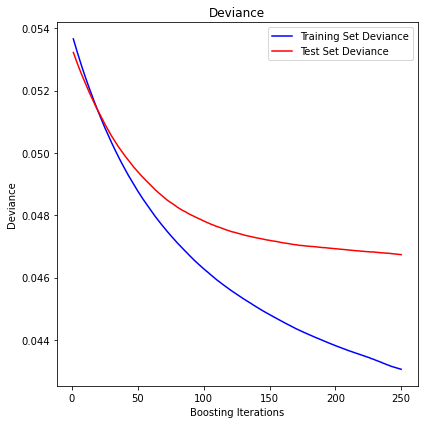

In [221]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [222]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=57, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# Compiling the model
model.compile(loss=root_mean_squared_error, optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2444
Epoch 2/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2300
Epoch 3/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2298
Epoch 4/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2302
Epoch 5/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2300
Epoch 6/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2298
Epoch 7/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2298
Epoch 8/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2292
Epoch 9/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2289
Epoch 10/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2296
Epoch 11/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2287
Epoch 12/50
480/480 [==============================] - 1s 1ms/step - loss: 0.2296
Epoch 13/50
480/480 [====

In [223]:
y_pred = model.predict(X_test)

129/129 [==============================] - 0s 917us/step


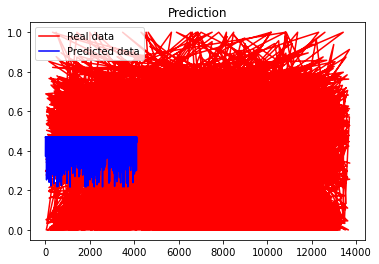

In [224]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

# Final Output

### GradientBoostingRegressor
The Root mean squared error (RMSE) on test set: 0.2162
Model Accuracy: 0.124
### Neural Networks
The Root mean squared error (RMSE) on test set:0.2262